# Lab 3 Evaluation

Names, Surnames, and Group : (to complete by 2 students)

**Ronan, Bonnet, 4IR-A1**

**Anna, Cazeneuve, 4IR-A1**


In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

Q1: A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

In [2]:
from utils import load_from_csv
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import csv

# Get dataset
train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

# Make 6 trees
trees = {
    "default":      tree.DecisionTreeClassifier(),
    "max_depth_20": tree.DecisionTreeClassifier(max_depth=20),
    "max_depth_3" : tree.DecisionTreeClassifier(max_depth=3),
    "best":         tree.DecisionTreeClassifier(splitter="best"),
    "random":       tree.DecisionTreeClassifier(splitter="random"),
    "min_leaf_10)": tree.DecisionTreeClassifier(min_samples_leaf=10),
    "all":   tree.DecisionTreeClassifier(min_samples_leaf=10, splitter="best", max_depth=7)
}

Q2: Train a decision tree for each of the previous configurations on the full dataset

In [3]:
import pandas as pd
from sklearn.base import BaseEstimator
from typing import Dict, Tuple, Any


def train_trees(
    trees: Dict[str, BaseEstimator],
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_test: np.ndarray,
    y_test: np.ndarray
) -> Tuple[Dict[str, float], Dict[str, BaseEstimator]]:
    """
    Train decision trees models and evaluate their performance.

    Params:
    trees (Dict[str, BaseEstimator]): A dictionary of tree models to train
    x_train (np.ndarray): Training data features
    y_train (np.ndarray): Training data labels
    x_test (np.ndarray): Test data features
    y_test (np.ndarray): Test data labels

    Returns:
    Tuple[Dict[str, float], Dict[str, BaseEstimator]]: 
        A tuple containing a dictionary of model scores and a dictionary of trained models.
    """
    scores = {}
    trained_trees = {}
    for model_name, model in trees.items():
        trained_model = model.fit(x_train, y_train) # Train the modle
        accuracy = np.mean(trained_model.predict(x_test) == y_test) # Calculate accuracy
        
        # Store the score and the trained model
        scores[model_name] = accuracy
        trained_trees[model_name] = trained_model
        
    return scores, trained_trees

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size = 0.20)

# Train models and get the scores
tree_scores, trained_trees = train_trees(trees, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)


# Display the results in a table using pandas
scores_df = pd.DataFrame(list(tree_scores.items()), columns=['Model', 'Accuracy'])
print(scores_df)

          Model  Accuracy
0       default  0.654976
1  max_depth_20  0.654028
2   max_depth_3  0.648341
3          best  0.654976
4        random  0.655924
5  min_leaf_10)  0.668246
6           all  0.674882


Q3: Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different topologies

In [4]:
from sklearn.model_selection import cross_val_score

def train_X_val(
    trees: Dict[str, BaseEstimator], 
    X: np.ndarray ,
    y: np.ndarray,
    cv: int = 5
) -> Dict[str, Dict[str,float]]:
    """
    Train and evalute decisions trees using cross-validaiton.

    Params:
    trees (Dict[str, BaseEstimator]): Dictionary of decisions trees to train
    X (np.ndarray): Data features
    y (np.ndarray): Data labels

    Returns:
    Dict[str, Dict[str, float]]: A dictionary with models' names as keys and their 
                                 cross-validation mean and standard deviation scores as values
    """
    
    results = {}
    for model_name, model in trees.items():
        # Perform cross-validation
        train_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

        # Score scores in dicitonary
        results[model_name] = {
            'mean_accuracy': np.mean(train_scores),
            'std_accuracy': np.std(train_scores),
        }

    return results

# Train and evalute with cross-validation
results = train_X_val(trees=trees, X=train_examples, y=train_labels, cv=5)

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results).T 
print(results_df)

              mean_accuracy  std_accuracy
default            0.647067      0.009313
max_depth_20       0.647447      0.008172
max_depth_3        0.637400      0.005095
best               0.646877      0.010660
random             0.647067      0.009466
min_leaf_10)       0.659774      0.010015
all                0.659017      0.004785


Q4: Propose an experimental study that shows the transition phase from underfitting to overfitting 

**Answer:**
A decision tree with a small depth tends to underfit and a decision tree with a big maximal depth tends to overfit. The idea of the experimental study is to make decisions trees with an incresing maximal depth to show the transition phase form underfitting to overfitting

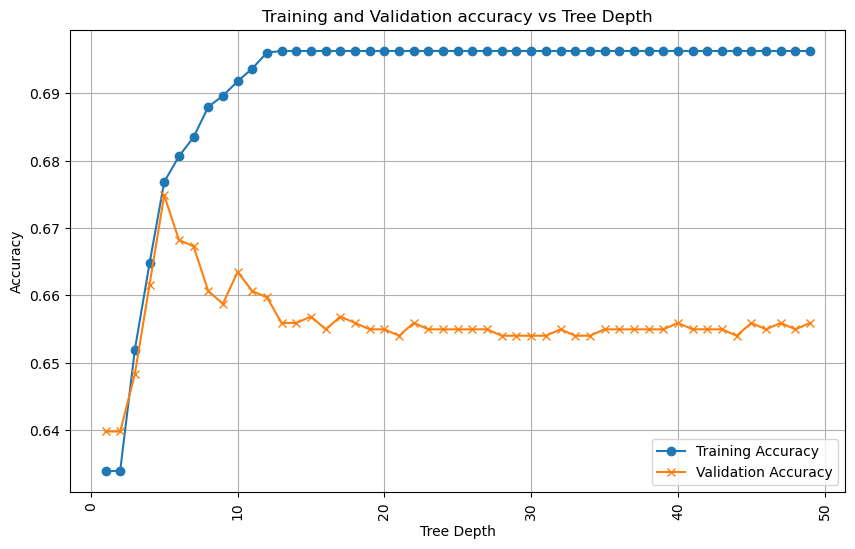

In [5]:
import matplotlib.pyplot as plt
# Create all trees with max_depth from 1 to max_max_depth
max_max_depth = 50
trees_inc_depths = {
    f"tree_with_depth={i}":tree.DecisionTreeClassifier(max_depth=i) for i in range(1,max_max_depth)
}

def calc_accuracies(
    trees: Dict[str, BaseEstimator],
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_val: np.ndarray,
    y_val: np.ndarray
) -> Dict[str, Dict[str,float]]:
    """
    Train and evaluate decision trees. It is made to show the transition phase
    from underfitting to overfitting.

    Params:
    trees (Dict[str, BaseEstimator]): Dictionary of decisions trees to train
    x_train (np.ndarray): Training data features
    y_train (np.ndarray): Training data labels
    x_val (np.ndarray): Validation data features
    y_val (np.ndarray): Validation data labels
    
    Returns:
    Dict[str, Dict[str, float]]: A dictionary with models' names as keys and their 
                                 cross-validation mean and standard deviation scores as values
    """
    results = {}
    for model_name, model in trees.items():
        # Train the model
        model.fit(x_train,y_train)

        train_acc = model.score(x_train, y_train)
        val_acc = model.score(x_val, y_val)
        
        # Score scores in dicitonary
        results[model_name] = {
            'train_accuracy': train_acc,
            'val_accuracy': val_acc,
        }

    return results

# Train and evaluate deicions trees
results = calc_accuracies(trees=trees_inc_depths, x_train=x_train, y_train=y_train, x_val=x_test, y_val=y_test)

results_df = pd.DataFrame(results).T

depths = list(range(1, max_max_depth))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, results_df['train_accuracy'], label='Training Accuracy', marker='o')
plt.plot(depths, results_df['val_accuracy'], label='Validation Accuracy', marker='x')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.title('Training and Validation accuracy vs Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

We can see the differents phases:

**Underfitting**
- Low Depth (1-3): Both training and validation scores are low

**Transition phase**
- Low-Med Depth (4-6): Training accuracy rapidly increases, validation accuracy also increases
- Moderate Depth (7-14): Training accuracy begings to plateau, validation accuracy has declined and starts to plateau

**Overfitting**
- High Depth (15-50): Both accuracy remain in their plateau phase. We can notice validation accuracy fluctuating, which demonstrate overtfitting.

The optmimal model should be arround 5-7 for max_depth.

Q5: Construct the confusion matrix on a particular good configuration (after explaining your choice)

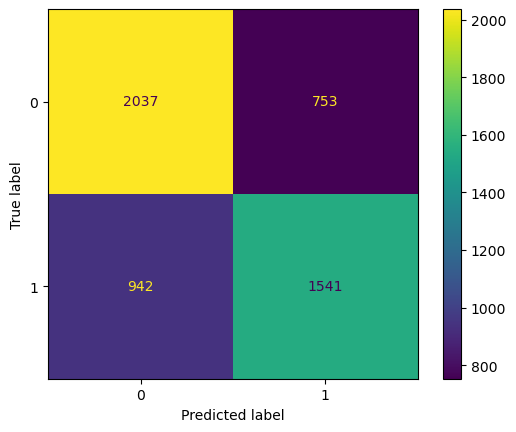

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# This model has been found by using grid search and 5-cross validation
best_model_found = tree.DecisionTreeClassifier(splitter="random", max_depth=20, min_samples_leaf=70)
best_model_found.fit(train_examples,train_labels)

# Get predictions to compare to ground truth
y_pred = best_model_found.predict(train_examples)

# Make confusion matrix
conf_matrix = confusion_matrix(train_labels, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()


Q6: Provide an evaluation of the fairness of the model based on the False Positive Rate

In [7]:
FPR = conf_matrix[0][1] / sum(conf_matrix[0])
print("False Positive Rate:", FPR)

False Positive Rate: 0.2698924731182796


The false positive rate is 27%. This rate is high, we can consider that the model is unfair.

Number of African-American: 3173
Number of Caucasian: 2100
3173
Caucasian FPR: 0.1486697965571205
African-American FPR: 0.3723544973544973


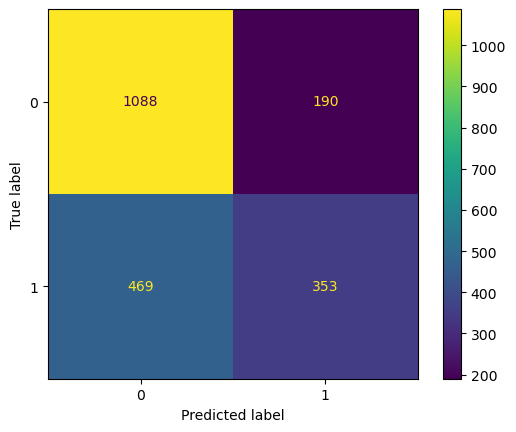

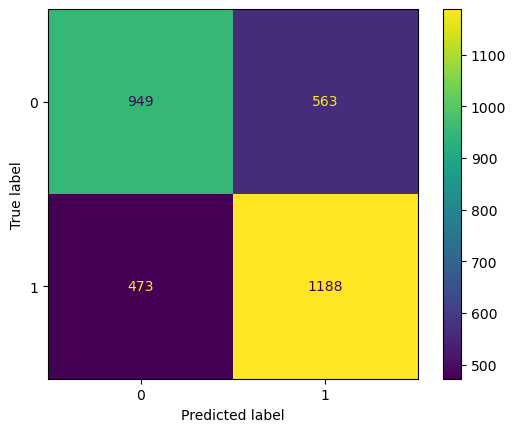

In [8]:
# Features: , ...
# Separate dataset to get 2 subsets with only African-Americans and Caucasians 
afam = [(r,label) for r,label in zip(train_examples, train_labels) if r[0]==1]
caucasian = [(r,label) for r,label in zip(train_examples, train_labels)  if r[1]==1]

print(f"Number of African-American: {len(afam)}")
print(f"Number of Caucasian: {len(caucasian)}")

afam_transposed = list(zip(*afam))
caucasian_transposed = list(zip(*caucasian))

print(len(afam_transposed[0]))

# Caucasian confusion matrix and False positive rate
caucasian_pred = best_model_found.predict(caucasian_transposed[0])
caucasian_cm = confusion_matrix(caucasian_transposed[1], caucasian_pred)
caucasian_fpr = caucasian_cm[0][1] / sum(caucasian_cm[0])

# African-American confusion matrix and False positive rate
afam_pred = best_model_found.predict(afam_transposed[0])
afam_cm = confusion_matrix(afam_transposed[1], afam_pred)
afam_fpr = afam_cm[0][1] / sum(afam_cm[0])

# Plot results
ConfusionMatrixDisplay(caucasian_cm).plot()
ConfusionMatrixDisplay(afam_cm).plot()

print(f"Caucasian FPR: {caucasian_fpr}")
print(f"African-American FPR: {afam_fpr}")



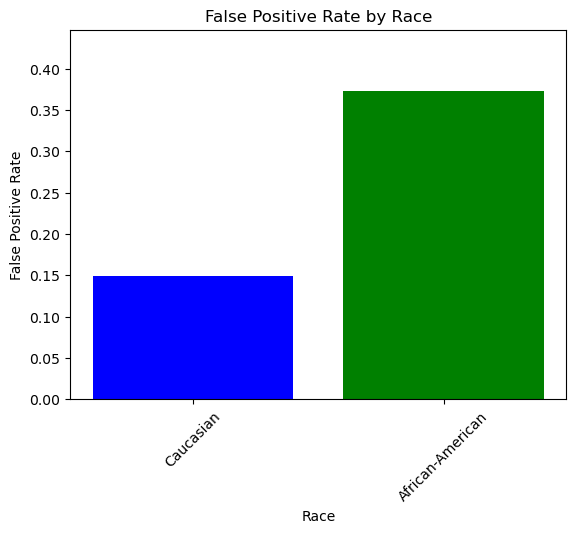

In [9]:
import matplotlib.pyplot as plt

# Calculate FPR for Caucasian and African-American groups
caucasian_fpr = caucasian_cm[0][1] / sum(caucasian_cm[0])
afam_fpr = afam_cm[0][1] / sum(afam_cm[0])

# Plotting the FPRs using bar chart
groups = ['Caucasian', 'African-American']
fprs = [caucasian_fpr, afam_fpr]

plt.bar(groups, fprs, color=['blue', 'green'])
plt.xlabel('Race')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate by Race')
plt.ylim(0, max(fprs) * 1.2)  # Increase ylim to display correctly annottations
plt.xticks(rotation=45)
plt.show()

By delving deeper into the comparison of race(ethnicities), we obtain the following results: 37% false positive rate for African-American versus 15% for Caucasians.
This indicates that the model is at least twice as biased against African-Americans. :(